In [74]:
import pandas as pd
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.manifold import TSNE
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D, Input, Flatten, Dense, Lambda, BatchNormalization, Dropout, GlobalAveragePooling2D, Concatenate, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Labels Dataset

In [75]:
labels = pd.read_csv('Combined Data/contrastive_learning_labels.csv')

In [76]:
labels.head(40)

pothole_id  mm_to_pixel_ratio  pothole_length  pothole_width  \
0       p1036           2.024225             256            174   
1       p1022           2.233278             769            518   
2        p417           2.744603             298            218   
3       p1552           1.583786             490            296   
4       p1234           4.087254             245            326   
5        p173           1.580941             220            269   
6       p1208           2.082177             321            304   
7        p167           1.329219             367            329   
8       p1591           1.223896             718            376   
9       p1585           1.597045             408            378   
10       p198           1.322455             348            384   
11       p985           0.854752             878            900   
12      p1354           2.769032             202            320   
13       p991           0.931978             493            438   
14       p946           2.690000             340            362   
15       p952           2.480664             295            360   
16      p1142           3.142480             153            176   
17       p239           2.074403             285            109   
18      p1624           1.791551             361            499   
19      p1630           1.805054             324            649   
20      p1156           2.151877             113            165   
21      p1618           1.641039             844            475   
22       p205           3.950379             266            310   
23       p211           2.688017             341            276   
24      p1195           2.474156             197            177   
25      p1194           2.974294              81            103   
26      p1180           2.438995             188            333   
27       p204           2.889401             124            195   
28      p1619           1.696749             684            596   
29      p1631           1.791700             616            369   
30      p1157           2.511010              69            118   
31      p1143           2.428759             224            190   
32      p1625           1.922323             496            478   
33       p238           2.617227             279            120   
34       p953           2.293192             329            260   
35       p990           1.170909             762            540   
36      p1355           3.048554             321            360   
37      p1433           2.293192             145            241   
38      p1427           2.687822             250            351   
39      p1341           2.511010             151            211   

    pothole_area_mm2  bags_used  class  
0       1.312671e+05       0.50      1  
1       1.802678e+06       2.00      4  
2       3.422434e+05       0.50      1  
3       2.085917e+05       0.50      1  
4       8.300200e+05       1.00      2  
5       9.155836e+04       0.25      0  
6       1.951369e+05       0.50      1  
7       2.398788e+05       0.50      1  
8       2.829228e+05       0.25      0  
9       1.761768e+05       0.25      0  
10      1.698878e+05       1.00      2  
11      4.285995e+05       1.00      2  
12      5.191037e+05       0.55      1  
13      1.213376e+05       1.00      2  
14      5.949810e+05       1.50      3  
15      3.732031e+05       0.50      1  
16      1.267672e+06       1.00      2  
17      3.263292e+05       1.00      2  
18      4.962174e+05       1.50      3  
19      3.681382e+05       1.00      2  
20      6.298505e+04       0.25      0  
21      8.841966e+05       1.00      2  
22      8.624142e+05      15.00      6  
23      5.848736e+05       1.50      3  
24      8.995776e+04       0.25      0  
25      2.747700e+04       0.50      1  
26      2.572782e+05       0.50      1  
27      1.514902e+05       1.50      3  
28      9.560110e+05       1.00      2  
29      5.750639e+05     

In [77]:
labels.shape

(874, 7)

# Creating Image Folder

In [5]:
train_images_dir = 'Combined Data/train_images'
output_dir = 'Combined Data/contrastive_learning_images'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Copy images to the output directory
for pothole_id in labels['pothole_id']:
    image_name = f"{pothole_id}.jpg"
    src_path = os.path.join(train_images_dir, image_name)
    dst_path = os.path.join(output_dir, image_name)
    
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
        print(f"Copied: {image_name}")
    else:
        print(f"Image {image_name} not found in {train_images_dir}")

print(f"All relevant images have been copied to {output_dir}.")

Copied: p1036.jpg
Copied: p1022.jpg
Copied: p417.jpg
Copied: p1552.jpg
Copied: p1234.jpg
Copied: p173.jpg
Copied: p1208.jpg
Copied: p167.jpg
Copied: p1591.jpg
Copied: p1585.jpg
Copied: p198.jpg
Copied: p985.jpg
Copied: p1354.jpg
Copied: p991.jpg
Copied: p946.jpg
Copied: p952.jpg
Copied: p1142.jpg
Copied: p239.jpg
Copied: p1624.jpg
Copied: p1630.jpg
Copied: p1156.jpg
Copied: p1618.jpg
Copied: p205.jpg
Copied: p211.jpg
Copied: p1195.jpg
Copied: p1194.jpg
Copied: p1180.jpg
Copied: p204.jpg
Copied: p1619.jpg
Copied: p1631.jpg
Copied: p1157.jpg
Copied: p1143.jpg
Copied: p1625.jpg
Copied: p238.jpg
Copied: p953.jpg
Copied: p990.jpg
Copied: p1355.jpg
Copied: p1433.jpg
Copied: p1427.jpg
Copied: p1341.jpg
Copied: p984.jpg
Copied: p199.jpg
Copied: p1584.jpg
Copied: p1590.jpg
Copied: p166.jpg
Copied: p172.jpg
Copied: p1221.jpg
Copied: p1547.jpg
Copied: p1553.jpg
Copied: p1235.jpg
Copied: p416.jpg
Copied: p1023.jpg
Copied: p1037.jpg
Copied: p1021.jpg
Copied: p1035.jpg
Copied: p428.jpg
Copied: p414.

Copied: p121.jpg
Copied: p1528.jpg
Copied: p135.jpg
Copied: p1064.jpg
Copied: p1070.jpg
Copied: p323.jpg
Copied: p445.jpg
Copied: p1058.jpg
Copied: p451.jpg
Copied: p337.jpg
Copied: p1017.jpg
Copied: p1003.jpg
Copied: p350.jpg
Copied: p344.jpg
Copied: p422.jpg
Copied: p1573.jpg
Copied: p1201.jpg
Copied: p1567.jpg
Copied: p152.jpg
Copied: p1229.jpg
Copied: p146.jpg
Copied: p191.jpg
Copied: p1598.jpg
Copied: p185.jpg
Copied: p1407.jpg
Copied: p1413.jpg
Copied: p998.jpg
Copied: p1349.jpg
Copied: p967.jpg
Copied: p973.jpg
Copied: p218.jpg
Copied: p1611.jpg
Copied: p1177.jpg
Copied: p224.jpg
Copied: p1639.jpg
Copied: p230.jpg
Copied: p1188.jpg
Copied: p1189.jpg
Copied: p231.jpg
Copied: p1638.jpg
Copied: p225.jpg
Copied: p1610.jpg
Copied: p1176.jpg
Copied: p219.jpg
Copied: p1604.jpg
Copied: p972.jpg
Copied: p966.jpg
Copied: p999.jpg
Copied: p1412.jpg
Copied: p1406.jpg
Copied: p184.jpg
Copied: p1599.jpg
Copied: p190.jpg
Copied: p147.jpg
Copied: p153.jpg
Copied: p1228.jpg
Copied: p1200.jpg
Cop

# Visualising positive and negative image pairs

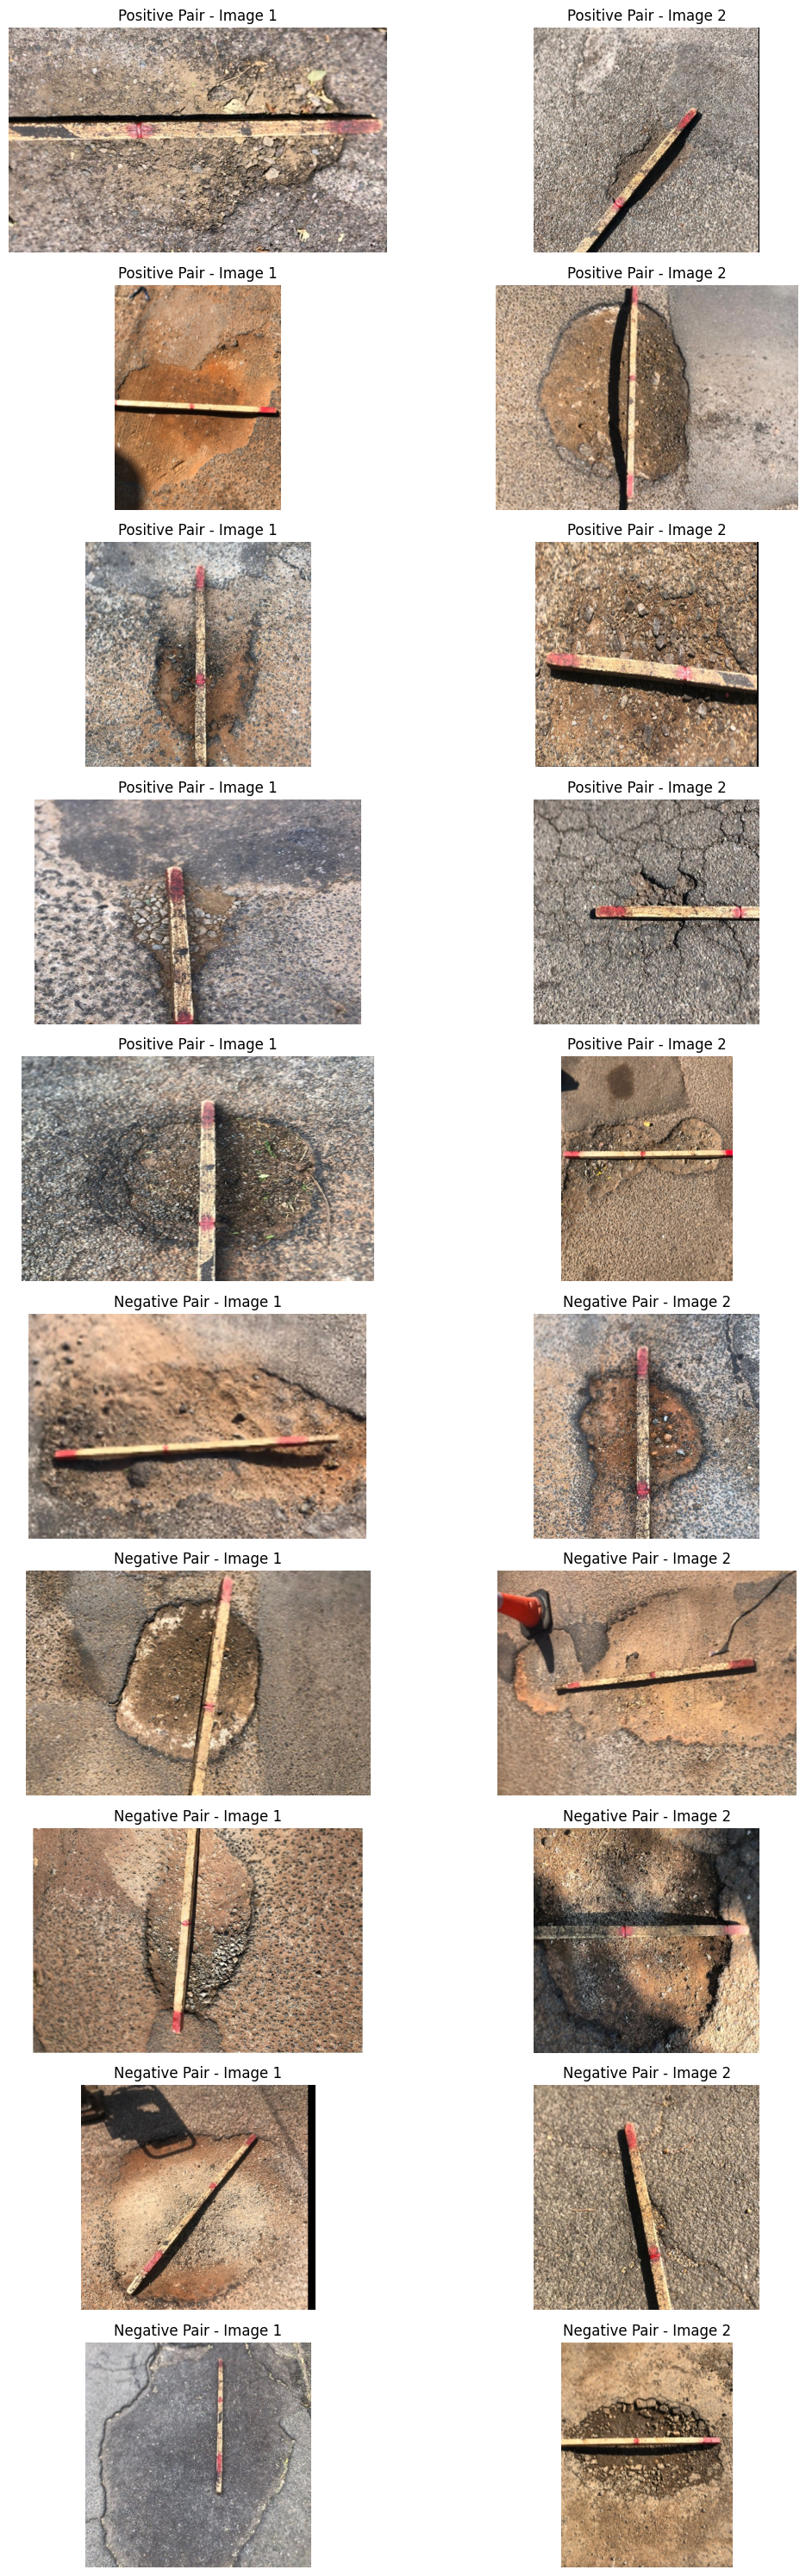

In [6]:
images_dir = 'Combined Data/contrastive_learning_images'  # Directory where the images are stored

# Create a dictionary to map labels to image paths
label_to_images = {}
for _, row in labels.iterrows():
    pothole_id = row['pothole_id']
    label = row['class']
    image_path = os.path.join(images_dir, f"{pothole_id}.jpg")
    
    if label not in label_to_images:
        label_to_images[label] = []
    label_to_images[label].append(image_path)

# Function to visualize image pairs
def visualize_pairs(pairs, titles):
    num_pairs = len(pairs)
    plt.figure(figsize=(12, num_pairs * 3))  # Adjust the figure size for better visibility
    for i, ((img1_path, img2_path), title) in enumerate(zip(pairs, titles)):
        img1 = mpimg.imread(img1_path)
        img2 = mpimg.imread(img2_path)
        
        plt.subplot(num_pairs, 2, i * 2 + 1)
        plt.imshow(img1)
        plt.title(f"{title} - Image 1")
        plt.axis('off')
        
        plt.subplot(num_pairs, 2, i * 2 + 2)
        plt.imshow(img2)
        plt.title(f"{title} - Image 2")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Create positive and negative pairs
positive_pairs = []
negative_pairs = []
positive_titles = []
negative_titles = []

# Create positive pairs (same label)
for label, image_paths in label_to_images.items():
    if len(image_paths) > 1:
        img1, img2 = random.sample(image_paths, 2)
        positive_pairs.append((img1, img2))
        positive_titles.append("Positive Pair")

# Create negative pairs (different labels)
all_labels = list(label_to_images.keys())
for _ in range(len(positive_pairs)):
    label1, label2 = random.sample(all_labels, 2)
    img1 = random.choice(label_to_images[label1])
    img2 = random.choice(label_to_images[label2])
    negative_pairs.append((img1, img2))
    negative_titles.append("Negative Pair")

# Combine the pairs and titles
all_pairs = positive_pairs[:5] + negative_pairs[:5]
all_titles = positive_titles[:5] + negative_titles[:5]

# Visualize the pairs
visualize_pairs(all_pairs, all_titles)

# Predictions with Model

### Preprocessing Data

In [78]:
train_df = pd.read_csv('Combined Data/train_df.csv')

In [79]:
train_df.head(3)

pothole_id  mm_to_pixel_ratio  pothole_length  pothole_width  \
0      p1036           2.024225             256            174   
1      p1022           2.233278             769            518   
2       p417           2.744603             298            218   

   pothole_area_mm2  bags_used  
0      1.143629e+05        0.5  
1      1.685416e+06        2.0  
2      3.453620e+05        0.5

In [80]:
from sklearn.preprocessing import StandardScaler
scaler_orginial = StandardScaler()
train_df[['pothole_area_mm2','mm_to_pixel_ratio']] = scaler_orginial.fit_transform(train_df[['pothole_area_mm2','mm_to_pixel_ratio']])

### Loading Embedding Model

In [81]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model_path = 'models/embedding_model_with_scalars.keras'  # Replace with your actual model path
embedding_model = load_model(model_path)

# Create a feature extraction model that outputs the embedding layer
feature_extraction_model = tf.keras.Model(inputs=embedding_model.input, outputs=embedding_model.get_layer('embedding_layer').output)

# Summary of the feature extraction model to verify
feature_extraction_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_layer_1        │ (None, 112, 112,  │      4,736 │ input_image[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        128 │ conv_layer_1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool_layer_1        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 56, 56,    │     18,496 │ pool_layer_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_55[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_35          │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 56, 56,    │     36,928 │ dropout_35[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 56, 56,    │      2,112 │ pool_layer_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_56[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_20 (Add)        │ (None, 56, 56,    │          0 │ conv2d_57[0][0],  │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 56, 56,    │          0 │ add_20[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 56, 56,    │     73,856 │ activation_20[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_58[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 56, 56,    │    147,584 │ dropout_36[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 56, 56,    │      8,320 │ activation_20[0]

 Total params: 1,330,560 (5.08 MB)

 Trainable params: 1,328,064 (5.07 MB)

 Non-trainable params: 2,496 (9.75 KB)

### Testing the embedding model

In [82]:
sample_image = np.random.rand(1, 224, 224, 3).astype(np.float32)  # Example image input, replace with your actual data
sample_scalar = np.array([[0.5, 0.5]], dtype=np.float32)  # Example scalar input, replace with your actual data

# Generate embeddings using the feature extraction model
embedding = feature_extraction_model([sample_image, sample_scalar])

# Print the embedding (or part of it) to verify it is generated
print("Embedding generated:", embedding[:10])

Embedding generated: tf.Tensor(
[[ 0.75592816  0.48437718 -1.0467719   0.27136117 -0.68597114  1.2702088
  -0.9517721  -0.23446816 -1.9428554  -1.2668784   3.155471    0.71678823
   1.5729444   2.2675843   1.2704328  -1.8041372  -1.7489367  -1.8677111
   2.3865225   1.76779    -1.7310183  -2.2387433   0.48898277  1.1439372
   2.736714   -0.8968476   0.84710103 -0.64706844 -1.9710677   0.81977594
  -1.5230619  -2.3913255   1.3791817   2.6460884  -1.8676773   1.8278936
  -0.99058914  2.6286502   1.707492    1.8308647  -2.3360045   1.6028956
  -2.111486    2.2550623  -2.5189342  -3.4749649  -0.6095322  -1.5830652
  -0.19263293 -1.6512085   1.7522782   1.6771953   1.3504707   0.46903127
   1.2143031   1.4531572   2.2751698  -1.6112202   2.138923    1.8364564
   1.4528341   1.0138036   2.7432036   0.6901158   2.499151   -1.727355
  -3.0367358   0.03453576 -0.824119   -0.12686338 -2.0644085  -2.6289914
   0.78675795 -0.8431793  -2.6925697   0.18948327  2.8567343   1.0051514
   0.37058792 -2.

## Train Embeddings

In [83]:
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

images_path = 'Combined Data/train_images'

# Create an empty DataFrame to store the embeddings
embeddings_list = []

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Shape (1, 224, 224, 3)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Iterate over each row in train_df
for index, row in tqdm(train_df.iterrows(), total=train_df.shape[0]):
    pothole_id = row['pothole_id']
    image_path = os.path.join(images_path, f'{pothole_id}.jpg')  # Assuming images are in .jpg format

    # Preprocess the image
    image = preprocess_image(image_path)

    # Extract the scalar features (pothole_area_mm2 and mm_to_pixel_ratio) and reshape them correctly
    scalar_features = np.array([row[['pothole_area_mm2', 'mm_to_pixel_ratio']]])

    # Generate the embedding using the feature extraction model
    embedding = feature_extraction_model([image, scalar_features])

    # Flatten the embedding (if necessary) and store it in the list
    flattened_embedding = embedding.numpy().flatten()  # Convert Tensor to NumPy array and flatten
    embeddings_list.append([pothole_id] + flattened_embedding.tolist())

# Create a DataFrame from the embeddings list
embedding_columns = [f'embedding_{i}' for i in range(len(flattened_embedding))]
embeddings_df = pd.DataFrame(embeddings_list, columns=['pothole_id'] + embedding_columns)
X_train = embeddings_df.copy()

# Display the final DataFrame with embeddings
embeddings_df.head()

100%|███████████████████████████████████████| 1009/1009 [00:53<00:00, 18.91it/s]


pothole_id  embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0      p1036     0.672386    -1.891787    -2.541468    -2.553394    -2.514316   
1      p1022    -7.519650    -1.630557    -0.623835     3.617127     2.059395   
2       p417     0.657249    -0.700965    -1.476948    -1.072219    -1.351877   
3      p1552     0.862890    -1.548191    -2.738514    -2.715777    -2.319341   
4      p1234     2.433607     0.574968    -0.982711     1.419073    -1.151659   

   embedding_5  embedding_6  embedding_7  embedding_8  ...  embedding_118  \
0     2.402783    -3.450070     2.271405    -0.947149  ...       1.408603   
1     3.215583     1.466597     3.002055     1.057335  ...      -0.419388   
2     2.072330    -2.256600     1.031841    -1.903326  ...      -0.354375   
3     2.456594    -2.995652     1.795399    -1.006004  ...       0.765572   
4     0.699516    -0.347719     0.647354    -1.807328  ...      -1.232444   

   embedding_119  embedding_120  embedding_121  embedding_122  embedding_123  \
0       3.233562      -1.575023      -2.139657      -3.756396      -3.375846   
1       0.637502      -2.392723       1.858999      -1.565627      -6.016029   
2       2.135500      -2.376395      -2.777196      -3.166522      -2.429977   
3       3.617332      -1.318856      -1.937656      -3.777996      -3.029340   
4       0.488780      -2.516870      -4.119073      -1.383779       1.697437   

   embedding_124  embedding_125  embedding_126  embedding_127  
0       3.094787      -2.512976      -2.874942      -3.131860  
1       3.223433      -1.586803      -4.141169       1.895275  
2       2.993927      -2.667208      -2.908530      -4.259810  
3       2.948723      -2.123279      -2.795058      -3.719877  
4       2.273644      -1.775543      -2.232104      -5.619233  

[5 rows x 129 columns]

### Visualising embeddings

In [84]:
embeddings_df = pd.merge(embeddings_df, labels[['pothole_id', 'bags_used']], on='pothole_id', how='left')

In [85]:
embeddings_df

pothole_id  embedding_0  embedding_1  embedding_2  embedding_3  \
0         p1036     0.672386    -1.891787    -2.541468    -2.553394   
1         p1022    -7.519650    -1.630557    -0.623835     3.617127   
2          p417     0.657249    -0.700965    -1.476948    -1.072219   
3         p1552     0.862890    -1.548191    -2.738514    -2.715777   
4         p1234     2.433607     0.574968    -0.982711     1.419073   
...         ...          ...          ...          ...          ...   
1004       p156     0.764923    -1.741900    -2.470547    -2.456569   
1005      p1007     0.598141    -1.526157    -2.838005    -2.718772   
1006       p426     0.066002    -2.039948    -1.932260    -1.855215   
1007       p340     0.804506    -2.127211    -3.080401    -3.216428   
1008       p432     0.554482    -0.604517    -1.729620    -1.490135   

      embedding_4  embedding_5  embedding_6  embedding_7  embedding_8  ...  \
0       -2.514316     2.402783    -3.450070     2.271405    -0.947149  ...   
1        2.059395     3.215583     1.466597     3.002055     1.057335  ...   
2       -1.351877     2.072330    -2.256600     1.031841    -1.903326  ...   
3       -2.319341     2.456594    -2.995652     1.795399    -1.006004  ...   
4       -1.151659     0.699516    -0.347719     0.647354    -1.807328  ...   
...           ...          ...          ...          ...          ...  ...   
1004    -2.403982     2.396536    -3.327190     2.197033    -1.039314  ...   
1005    -2.073710     2.381020    -2.854637     1.455941    -0.823970  ...   
1006    -2.269057     2.247714    -3.423040     2.110652    -1.140359  ...   
1007    -2.737189     2.530583    -3.453910     2.007460    -0.713343  ...   
1008    -1.298893     2.011060    -2.390831     1.071020    -1.575055  ...   

      embedding_119  embedding_120  embedding_121  embedding_122  \
0          3.233562      -1.575023      -2.139657      -3.756396   
1          0.637502      -2.392723       1.858999      -1.565627   
2          2.135500      -2.376395      -2.777196      -3.166522   
3          3.617332      -1.318856      -1.937656      -3.777996   
4          0.488780      -2.516870      -4.119073      -1.383779   
...             ...            ...            ...            ...   
1004       3.154089      -1.656716      -2.233029      -3.772100   
1005       3.737800      -1.104833      -1.547523      -3.666818   
1006       2.716134      -2.167222      -2.468102      -3.679639   
1007       3.904094      -0.851081      -1.525695      -3.819658   
1008       2.422766      -1.948091      -2.331444      -2.980231   

      embedding_123  embedding_124  embedding_125  embedding_126  \
0         -3.375846       3.094787      -2.512976      -2.874942   
1         -6.016029       3.223433      -1.586803      -4.141169   
2         -2.429977       2.993927      -2.667208      -2.908530   
3         -3.029340       2.948723      -2.123279      -2.795058   
4          1.697437       2.273644      -1.775543      -2.232104   
...             ...            ...            ...            ...   
1004      -3.260224       3.119875      -2.539098      -2.876403   
1005      -2.937673       2.778346      -1.860770      -2.742297   
1006      -3.665596       3.124473      -2.741074      -3.067757   
1007      -3.314188       3.020133      -2.071856      -2.567086   
1008      -2.435781       2.885154      -2.275259      -2.597754   

      embedding_127  bags_used  
0         -3.131860        0.5  
1          1.895275        2.0  
2         -4.259810        0.5  
3         -3.719877        0.5  
4         -5.619233        1.0  
...             ...        ...  
1004      -3.332359        0.5  
1005      -3.717708        0.5  
1006      -2.855774        0.5  
1007      -3.060136        0.5  
1008      -4.349578        1.0  

[1009 rows x 130 columns]

In [86]:
bins = [0, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, np.inf]
labels = ['0.25', '0.25-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4+']
embeddings_df['bags_used_binned'] = pd.cut(embeddings_df['bags_used'], bins=bins, labels=labels)

# Perform t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_df.drop(columns=['pothole_id', 'bags_used', 'bags_used_binned']))

# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=embeddings_2d, columns=['TSNE1', 'TSNE2'])
tsne_df['bags_used_binned'] = embeddings_df['bags_used_binned']

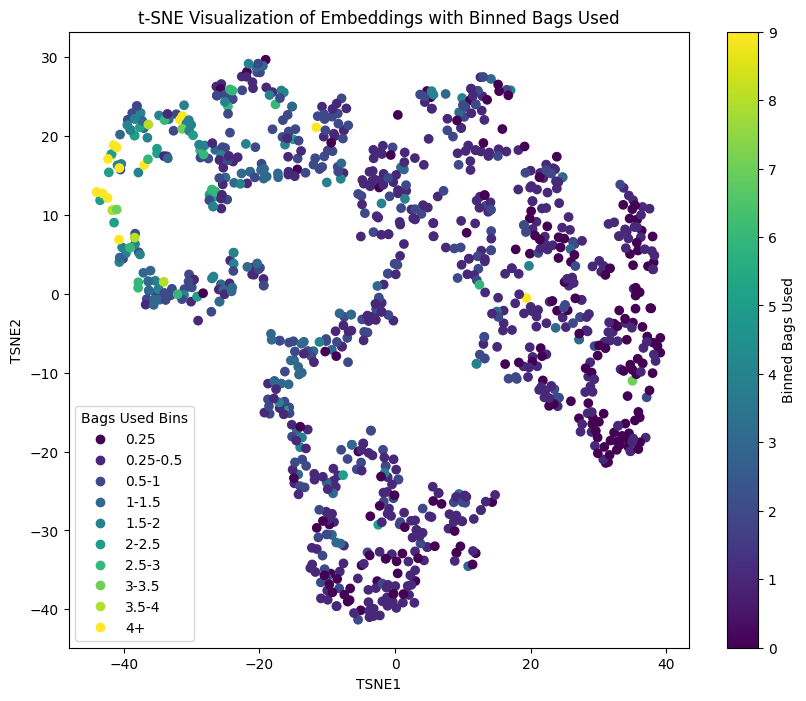

In [87]:
# Plotting the t-SNE result with categorical bins
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['bags_used_binned'].cat.codes, cmap='viridis')
plt.colorbar(scatter, label='Binned Bags Used')
plt.title('t-SNE Visualization of Embeddings with Binned Bags Used')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

# Adding the legend manually for categorical colors
handles, _ = scatter.legend_elements()
plt.legend(handles, labels, title="Bags Used Bins")

plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# Binning the 'bags_used' column
bins = [0, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, np.inf]
labels = ['0.25', '0.25-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4+']
embeddings_df['bags_used_binned'] = pd.cut(embeddings_df['bags_used'], bins=bins, labels=labels)

# Perform t-SNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_df.drop(columns=['pothole_id', 'bags_used', 'bags_used_binned']))

# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=embeddings_3d, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['bags_used_binned'] = embeddings_df['bags_used_binned']

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    tsne_df, x='TSNE1', y='TSNE2', z='TSNE3',
    color=tsne_df['bags_used_binned'],
    labels={'color': 'Bags Used Bins'},
    title='t-SNE 3D Visualization of Embeddings with Binned Bags Used',
    hover_data={'TSNE1': True, 'TSNE2': True, 'TSNE3': True, 'bags_used_binned': True}
)

# Show the plot
fig.show()

## Training Regression Model

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold

In [61]:
embeddings_df.head(5)

pothole_id  embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0      p1036     0.312524    -0.017258     0.052182    -0.355831    -0.030509   
1      p1022     0.298805    -0.020520     0.063478    -0.395137     0.068688   
2       p417     0.245833    -0.023717     0.042937    -0.338801     0.084810   
3      p1552     0.327351    -0.015455     0.048425    -0.240201    -0.138193   
4      p1234     0.283291    -0.023010     0.078285    -0.435874     0.055552   

   embedding_5  embedding_6  embedding_7  embedding_8  ...  embedding_56  \
0    -0.351314     0.024642     0.019076     0.173184  ...      0.358736   
1    -0.385226    -0.021903     0.037161     0.181610  ...      0.362426   
2    -0.360523    -0.027310     0.020514     0.122059  ...      0.313779   
3    -0.315275     0.011291     0.050004     0.255107  ...      0.310165   
4    -0.376273     0.064420     0.011326     0.098914  ...      0.382002   

   embedding_57  embedding_58  embedding_59  embedding_60  embedding_61  \
0     -0.389016      0.169114     -0.081585      0.269176     -0.192614   
1     -0.461807      0.209366     -0.076155      0.231620     -0.097698   
2     -0.387074      0.123888     -0.067940      0.154306     -0.073228   
3     -0.282436      0.208121     -0.100772      0.236363     -0.177549   
4     -0.398323     -0.091544     -0.087837      0.251591     -0.206141   

   embedding_62  embedding_63  bags_used  bags_used_binned  
0      0.160580     -0.292328        0.5          0.25-0.5  
1      0.206005     -0.304589        2.0             1.5-2  
2      0.185821     -0.267844        0.5          0.25-0.5  
3      0.111721     -0.223866        0.5          0.25-0.5  
4      0.214085     -0.343304        1.0             0.5-1  

[5 rows x 67 columns]

### KMeans Regression

In [62]:
X_train = embeddings_df.drop(columns=['pothole_id', 'bags_used', 'bags_used_binned'])  # Assuming embeddings_df contains embeddings without 'pothole_id'
y_train = train_df['bags_used']

# Standardize the embeddings
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [63]:
knn_regressor_model = KNeighborsRegressor(n_neighbors=5)

In [64]:
knn_regressor_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [65]:
y_pred = knn_regressor_model.predict(X_train_scaled)
print(r2_score(y_train, y_pred))

0.433364116478935


In [67]:
X_train = embeddings_df.drop(columns=['pothole_id', 'bags_used', 'bags_used_binned'])  # Assuming embeddings_df contains embeddings without 'pothole_id'
y_train = train_df['bags_used']

# Standardize the embeddings
scaler_embeddings = StandardScaler()
X_train_scaled = scaler_embeddings.fit_transform(X_train)

# Define the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Define the R^2 scorer
r2_scorer = make_scorer(r2_score)

# Perform cross-validation
kf = KFold(n_splits=12, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=kf, scoring=r2_scorer)

# Calculate and print the mean R^2 score
mean_r2 = cv_scores.mean()
print(cv_scores)
print(f'Estimated R^2 score from cross-validation: {mean_r2:.4f}')

[ 0.02009072 -0.76226023  0.37497383  0.00142255  0.23050278  0.68552531
  0.03408393 -0.38391372 -0.82576276 -1.16148816  0.29930267  0.0865377 ]
Estimated R^2 score from cross-validation: -0.1167


### Predicting test dataset

In [24]:
test_df = pd.read_csv('Combined Data/test_df.csv')

In [25]:
test_df.head(4)

pothole_id  mm_to_pixel_ratio  pothole_length  pothole_width  \
0      p1181           2.681630             161            232   
1      p1430           2.068926             206            258   
2      p1409           2.499969             181            280   
3       p406           4.098223             291            378   

   pothole_area_mm2  
0      2.354056e+05  
1      1.669634e+05  
2      7.106072e+04  
3      1.124723e+06

#### Test Embeddings

In [26]:
test_df[['pothole_area_mm2','mm_to_pixel_ratio']] = scaler_orginial.transform(test_df[['pothole_area_mm2','mm_to_pixel_ratio']])

In [27]:
images_path = 'Combined Data/test_images'  # Update this to point to the test images

# Create an empty DataFrame to store the embeddings
embeddings_list = []

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Shape (1, 224, 224, 3)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Iterate over each row in test_df
for index, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    pothole_id = row['pothole_id']
    image_path = os.path.join(images_path, f'{pothole_id}.jpg')  # Assuming images are in .jpg format

    # Preprocess the image
    image = preprocess_image(image_path)

    # Extract the scalar features (pothole_area_mm2 and mm_to_pixel_ratio) and reshape them correctly
    scalar_features = np.array([row[['pothole_area_mm2', 'mm_to_pixel_ratio']]])

    # Generate the embedding using the feature extraction model
    embedding = feature_extraction_model([image, scalar_features])

    # Flatten the embedding (if necessary) and store it in the list
    flattened_embedding = embedding.numpy().flatten()  # Convert Tensor to NumPy array and flatten
    embeddings_list.append([pothole_id] + flattened_embedding.tolist())

# Create a DataFrame from the embeddings list
embedding_columns = [f'embedding_{i}' for i in range(len(flattened_embedding))]
embeddings_df = pd.DataFrame(embeddings_list, columns=['pothole_id'] + embedding_columns)
X_test = embeddings_df.copy()

# Display the final DataFrame with embeddings
embeddings_df.head()

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 28.94it/s]


pothole_id  embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0      p1181     0.577206    -1.090229    -1.592899    -1.500063    -1.594461   
1      p1430     0.798416    -1.599702    -2.363944    -2.351586    -2.272858   
2      p1409     0.306974    -2.039008    -2.293843    -2.213364    -2.383506   
3       p406     2.446454     0.843060    -1.149966     2.105420    -1.558614   
4       p104     0.651529    -1.169722    -1.907487    -1.749123    -1.720263   

   embedding_5  embedding_6  embedding_7  embedding_8  ...  embedding_118  \
0     2.054469    -2.678501     1.448902    -1.620870  ...       0.583589   
1     2.338863    -3.194647     2.092152    -1.115378  ...       1.111444   
2     2.406518    -3.489647     2.357815    -1.002173  ...       1.684128   
3     0.940375    -0.136600     1.981263    -1.180463  ...      -0.265676   
4     2.183205    -2.780289     1.670589    -1.495240  ...       0.549796   

   embedding_119  embedding_120  embedding_121  embedding_122  embedding_123  \
0       2.372926      -2.135813      -2.509591      -3.455612      -2.807735   
1       3.056850      -1.708227      -2.273660      -3.741371      -3.145468   
2       2.977324      -2.022244      -2.406080      -3.861154      -3.674086   
3      -0.053439      -2.844524      -4.050560      -1.212117       2.391732   
4       2.606632      -2.104391      -2.527839      -3.544210      -2.942263   

   embedding_124  embedding_125  embedding_126  embedding_127  
0       2.997283      -2.598897      -2.906675      -3.689473  
1       3.103300      -2.528410      -2.869866      -3.458324  
2       3.192097      -2.704958      -3.065545      -2.898032  
3       2.394502      -1.609325      -1.849063      -5.277297  
4       3.063565      -2.541794      -2.934415      -3.741625  

[5 rows x 129 columns]

In [28]:
X_test[embedding_columns] = scaler_embeddings.transform(X_test[embedding_columns])

# Display the final scaled embeddings
X_test.head()

pothole_id  embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0      p1181     0.150407     0.119041     0.252177    -0.088158     0.074958   
1      p1430     0.308399    -0.450564    -0.368296    -0.402886    -0.544563   
2      p1409    -0.042596    -0.941721    -0.311884    -0.351799    -0.645608   
3       p406     1.485455     2.280513     0.608613     1.244449     0.107694   
4       p104     0.203490     0.030165    -0.000977    -0.180212    -0.039926   

   embedding_5  embedding_6  embedding_7  embedding_8  ...  embedding_118  \
0    -0.196256    -0.227587    -0.110747    -0.460128  ...       0.046542   
1     0.336936    -0.618170     0.266613    -0.052652  ...       0.254918   
2     0.463778    -0.841406     0.422463     0.038603  ...       0.480991   
3    -2.285001     1.695946     0.201560    -0.105116  ...      -0.288713   
4     0.045103    -0.304613     0.019305    -0.358858  ...       0.033202   

   embedding_119  embedding_120  embedding_121  embedding_122  embedding_123  \
0      -0.052114      -0.483880      -0.317681      -0.299766      -0.116348   
1       0.315575       0.210339      -0.119821      -0.560404      -0.309123   
2       0.272821      -0.299492      -0.230873      -0.669657      -0.610852   
3      -1.356571      -1.634525      -1.609993       1.746504       2.851449   
4       0.073530      -0.432864      -0.332985      -0.380576      -0.193135   

   embedding_124  embedding_125  embedding_126  embedding_127  
0       0.218268      -0.501513      -0.191894      -0.119071  
1       0.415289      -0.408990      -0.125844      -0.012358  
2       0.580309      -0.640732      -0.476971       0.246310  
3      -0.901937       0.797433       1.705889      -0.852114  
4       0.341446      -0.426558      -0.241671      -0.143148  

[5 rows x 129 columns]

In [29]:
X_test.columns

Index(['pothole_id', 'embedding_0', 'embedding_1', 'embedding_2',
       'embedding_3', 'embedding_4', 'embedding_5', 'embedding_6',
       'embedding_7', 'embedding_8',
       ...
       'embedding_118', 'embedding_119', 'embedding_120', 'embedding_121',
       'embedding_122', 'embedding_123', 'embedding_124', 'embedding_125',
       'embedding_126', 'embedding_127'],
      dtype='object', length=129)

In [38]:
y_pred = knn_regressor_model.predict(X_test.drop('pothole_id', axis=1))

/Users/christiaanhildebrand/anaconda3/envs/Main/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


### Creating Prediction Dataset

In [39]:
pred_df = pd.DataFrame({
    'Pothole number': test_df['pothole_id'],
    'Bags used ': y_pred
})

# Display the first few rows of pred_df
pred_df.head(2)

Pothole number  Bags used 
0          p1181         0.6
1          p1430         0.7

In [40]:
pred_df['Pothole number'] = pred_df['Pothole number'].str.replace("p","").astype(int)
pred_df = pred_df.sort_values('Pothole number')

In [41]:
pred_df.set_index('Pothole number', inplace=True)

In [42]:
pred_df.to_csv('../../data/predictions/KNN-Reg_embeddings.csv')

In [43]:
pred_df.head(30)

Bags used 
Pothole number            
103                   0.65
104                   0.65
105                   1.00
108                   0.65
114                   2.22
143                   0.45
144                   1.30
406                   2.20
434                   0.60
450                   0.70
470                   0.40
473                   0.30
479                   0.45
1040                  0.70
1086                  0.50
1115                  0.60
1134                  0.30
1161                  0.40
1162                  0.30
1181                  0.60
1198                  0.90
1205                  0.95
1250                  0.35
1270                  1.00
1278                  0.25
1280                  0.35
1296                  0.80
1409                  0.35
1430                  0.70
1438                  0.60

### SVR

In [ ]:
X_train = embeddings_df.drop(columns=['pothole_id'])  # Assuming embeddings_df contains embeddings without 'pothole_id'
y_train = train_df['bags_used']

# Standardize the embeddings
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
svr = SVR(kernel='rbf')

In [ ]:
svr.fit(X_train_scaled, y_train)

In [ ]:
y_pred = svr.predict(X_train_scaled)
print(r2_score(y_train, y_pred))

In [ ]:
X_train = embeddings_df.drop(columns=['pothole_id'])  # Assuming embeddings_df contains embeddings without 'pothole_id'
y_train = train_df['bags_used']

# Standardize the embeddings
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the KNN regressor
svr = SVR()  # You can adjust the number of neighbors (k)

# Define the R^2 scorer
r2_scorer = make_scorer(r2_score)

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=kf, scoring=r2_scorer)

# Calculate and print the mean R^2 score
mean_r2 = cv_scores.mean()
print(f'Estimated R^2 score from cross-validation: {mean_r2:.4f}')